# K-means Clustering - Image Compressing

In [1]:
import pandas as pd
import numpy as np
from utils import *

%matplotlib inline

## 1. Implementing K-Means

### 1.1 Finding closest centroids

In [2]:
def find_closest_centroids(X, centroids):
    # set K
    K = centroids[0]

    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):
        distance = []
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distance.append(norm_ij)

        idx[i] = np.argmin(distance)
    # print(distance)
    return idx

In [3]:
X = load_data()

In [4]:
X.shape

(300, 2)

In [5]:
print("First 5 elems of X are:\n", X[:5])
print("The shape of X is:", X.shape)

First 5 elems of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


In [6]:
# select the initial set of centroids (3 centroids)
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# find the closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

# print closest centroids for the first three elemets
print("First three elements in idx are: ", idx[:3])

from public_tests import *
find_closest_centroids_test(find_closest_centroids)

First three elements in idx are:  [0 2 1]
All tests passed!


In [7]:
initial_centroids.shape

(3, 2)

## 1.2 Computing centroid means

In [8]:
def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))

    for k in range(K):
        points = X[idx == k]
        centroids[k] = np.mean(points, axis=0)

    return centroids

In [9]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are: ", centroids)

# UNIT TEST
compute_centroids_test(compute_centroids)

The centroids are:  [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]
All tests passed!


## 2. K-Means on a sample dataset

In [10]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)

    # Run K-Means
    for i in range(max_iters):
        # output progress
        print("K-Means iteration %d%d" % (i, max_iters - 1))

        # for each example in X assign it to the closest cetroid
        idx = find_closest_centroids(X, centroids)

        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids

        # given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)

    plt.show()
    return centroids, idx

K-Means iteration 09
K-Means iteration 19
K-Means iteration 29
K-Means iteration 39
K-Means iteration 49
K-Means iteration 59
K-Means iteration 69
K-Means iteration 79
K-Means iteration 89
K-Means iteration 99


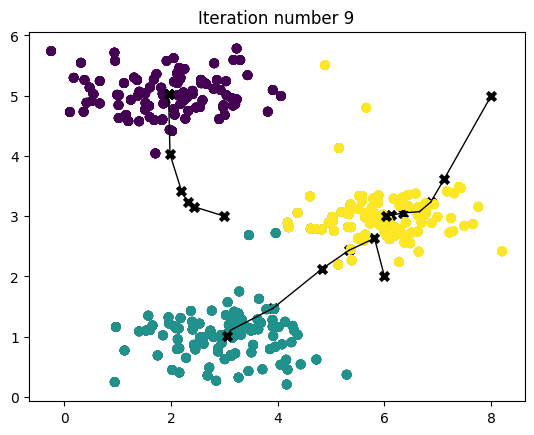

In [11]:
X = load_data()

initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
K = 3

max_iters = 10

centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)


## 3. Random Initialization

In [12]:
def kMeans_init_centroids(X, K):    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

## 4. Image Compression with K-Means

In [13]:
original_img = plt.imread('bird_small.png')

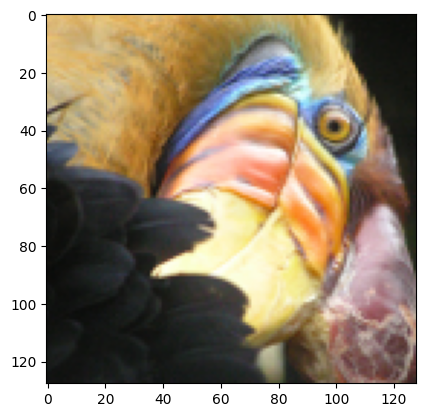

In [14]:
plt.imshow(original_img)

In [15]:
print("Shape of the original image is:", original_img.shape)

Shape of the original image is: (128, 128, 3)


In [16]:
original_img = original_img / 255

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [22]:
K = 16                    
max_iters = 10               

initial_centroids = kMeans_init_centroids(X_img, K) 

centroids, idx = run_kMeans(X_img, initial_centroids, max_iters) 

K-Means iteration 09
K-Means iteration 19
K-Means iteration 29
K-Means iteration 39
K-Means iteration 49
K-Means iteration 59
K-Means iteration 69
K-Means iteration 79
K-Means iteration 89
K-Means iteration 99


In [23]:
centroids.shape

(16, 3)

In [18]:
print("Shape of idx: ", idx.shape)
print("Closest Centroid for the first five elements: ", idx[:5])


Shape of idx:  (16384,)
Closest Centroid for the first five elements:  [15  0  0 15 15]


In [19]:
X_recovered = centroids[idx, :]

X_recovered = np.reshape(X_recovered, original_img.shape)

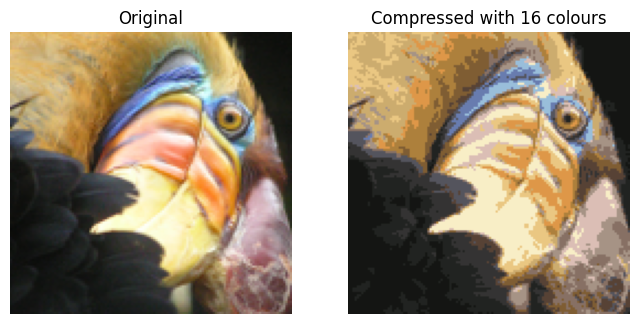

In [20]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()

In [21]:
plt.imsave('images/recovered.png', X_recovered*255)